# Milestone 1

`Muhamad Fandhi - FTDS Batch 003`

## Link URL Dashboard

https://public.tableau.com/shared/CDXG97XHM?:display_count=n&:origin=viz_share_link

## Problem Statement

Evaluating JonJon Bikeshop sales by comparing 2015 profit on 6 branches.

**Specific**  : We want to evaluate JonJon Bikeshop sales in 2015 and we will do it by comparing the profit on 6 branches

**Measurable** : We can achieve our goal by measuring the sales of the bikeshop which resulting in us knowing which branches stands out the most among the other. 

**Achievable** : The goal can be achieved because we have the data we need that is profit of JonJon Bikeshop sales.

**Relevant** : To keep the bikeshop going we need to know how is the sales going and evaluate the result to keep growing.

**Time-bound** : We are only evaluating the sales of JonJon Bikeshop in 2015.

To make the evaluation of JonJon Bikeshop more focused, we will create some boundary by using 5W + 1H method as follows:

1. What is the top category that gives the most profit for our bikeshop?

2. What's the biggest profit bike?

3. Where is the bikeshop that has the biggest number of sold item? what item?

4. How many times each age group shop in our bikeshop?

5. What is the average number of profit contributed by each age group?

6. Where is the bikeshop that has the least profit and most profit?

7. How is the trend of sales for each branch in the past year?

8. Is the average of profit of Germany branch is the same as France branch?

## Working Area

Here, we will start our analysis of the data but first we need to import libraries that will be needed.

### Importing Libraries

In [2]:
import pandas as pd             # importing library that will be needed
import numpy as np
from numpy import percentile
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### Data Loading

First, we need to load our dataset that is in the following link. 

https://www.kaggle.com/datasets/sadiqshah/bike-sales-in-europe

In [3]:
df = pd.read_csv('bike_sales.csv')
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


### Data Cleaning

In this section we will clean our data before we can continue to explore the data further.

First, we want to check if there are missing values in our dataset.

In [4]:
df.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

From here, we can see that our data has no missing values. Next, we check if the datatype of each columns is according to its value type.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

From here, we see that the Date column data type is still object. We want to convert this to Datetime to make it easier to process the Date column.

In [6]:
df['Date']= pd.to_datetime(df['Date'])
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 113036 entries, 0 to 113035
Series name: Date
Non-Null Count   Dtype         
--------------   -----         
113036 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 883.2 KB


We have changed the datatype for Date column. Next we want to sort the data we have by date.

In [7]:
df = df.sort_values(by = 'Date')

We already have the data sorted by date. Now it will be easier for us to access the column. 

Next, we want to filter our data by only one year of entries. We are going to evaluate the sales of JonJon Bikeshop in 2015. So, to make it one year of entries the start date should be 1st of January 2015 and the end date should be 31st of December 2015.

In [8]:
df = df[(df['Date'] >= '2015-01-01')&(df['Date'] < '2016-01-01')]
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
67591,2015-01-01,1,January,2015,42,Adults (35-64),M,Australia,Queensland,Bikes,Road Bikes,"Road-350-W Yellow, 48",1,1083,1701,346,1083,1429
61259,2015-01-01,1,January,2015,37,Adults (35-64),F,Germany,Hamburg,Bikes,Road Bikes,"Road-250 Black, 48",1,1555,2443,717,1555,2272
60201,2015-01-01,1,January,2015,53,Adults (35-64),F,France,Seine (Paris),Bikes,Road Bikes,"Road-250 Black, 44",1,1555,2443,448,1555,2003
69451,2015-01-01,1,January,2015,27,Young Adults (25-34),F,Australia,New South Wales,Bikes,Road Bikes,"Road-550-W Yellow, 48",1,713,1120,261,713,974
54069,2015-01-01,1,January,2015,36,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Silver, 46",1,1266,2320,1008,1266,2274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4078,2015-12-31,31,December,2015,40,Adults (35-64),F,France,Essonne,Accessories,Bottles and Cages,Water Bottle - 30 oz.,4,2,5,11,8,19
2373,2015-12-31,31,December,2015,22,Youth (<25),F,United Kingdom,England,Accessories,Bottles and Cages,Water Bottle - 30 oz.,24,2,5,67,48,115
32333,2015-12-31,31,December,2015,45,Adults (35-64),M,France,Essonne,Accessories,Helmets,"Sport-100 Helmet, Red",23,13,35,474,299,773
8961,2015-12-31,31,December,2015,54,Adults (35-64),M,France,Charente-Maritime,Accessories,Bottles and Cages,Road Bottle Cage,17,3,9,99,51,150


Now, we have the data sorted by date, but the index is still scrambled. We need to fix it by resetting the index.

In [9]:
df.reset_index(inplace=True,drop=True)
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2015-01-01,1,January,2015,42,Adults (35-64),M,Australia,Queensland,Bikes,Road Bikes,"Road-350-W Yellow, 48",1,1083,1701,346,1083,1429
1,2015-01-01,1,January,2015,37,Adults (35-64),F,Germany,Hamburg,Bikes,Road Bikes,"Road-250 Black, 48",1,1555,2443,717,1555,2272
2,2015-01-01,1,January,2015,53,Adults (35-64),F,France,Seine (Paris),Bikes,Road Bikes,"Road-250 Black, 44",1,1555,2443,448,1555,2003
3,2015-01-01,1,January,2015,27,Young Adults (25-34),F,Australia,New South Wales,Bikes,Road Bikes,"Road-550-W Yellow, 48",1,713,1120,261,713,974
4,2015-01-01,1,January,2015,36,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Silver, 46",1,1266,2320,1008,1266,2274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24438,2015-12-31,31,December,2015,40,Adults (35-64),F,France,Essonne,Accessories,Bottles and Cages,Water Bottle - 30 oz.,4,2,5,11,8,19
24439,2015-12-31,31,December,2015,22,Youth (<25),F,United Kingdom,England,Accessories,Bottles and Cages,Water Bottle - 30 oz.,24,2,5,67,48,115
24440,2015-12-31,31,December,2015,45,Adults (35-64),M,France,Essonne,Accessories,Helmets,"Sport-100 Helmet, Red",23,13,35,474,299,773
24441,2015-12-31,31,December,2015,54,Adults (35-64),M,France,Charente-Maritime,Accessories,Bottles and Cages,Road Bottle Cage,17,3,9,99,51,150


Now, our dataset has no missing values with the correct datatype and is sorted and filtered by the date like we needed. Next, we will explore our data in data exploration section.

### Exploratory Data Analysis

#### Central Tendency

We want to check the central tendency of our data for each branch.


First, we want to know, for each branches, who shops the most in our Bikeshop, what gender shops the most in our Bikeshop, and what category is the most shopped.

In [10]:
age_group_ct = df.groupby(['Country'])[['Age_Group','Customer_Gender','Product_Category','Sub_Category']].agg(pd.Series.mode)
age_group_ct

,Age_Group,Customer_Gender,Product_Category,Sub_Category
Country,,,,
Australia,Young Adults (25-34),M,Accessories,Tires and Tubes
Canada,Adults (35-64),M,Accessories,Tires and Tubes
France,Adults (35-64),M,Accessories,Tires and Tubes
Germany,Adults (35-64),F,Accessories,Tires and Tubes
United Kingdom,Adults (35-64),F,Accessories,Tires and Tubes
United States,Adults (35-64),F,Accessories,Tires and Tubes


From these data, we know that most of our branches has Adults (age ranging from 35-64) as the top buyers except on Australia that has Young Adults (age ranging from 25-34). As the most shopped category in all our branches is Accessories with Sub category Tires and Tubes.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'United Kingdom'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Germany')])

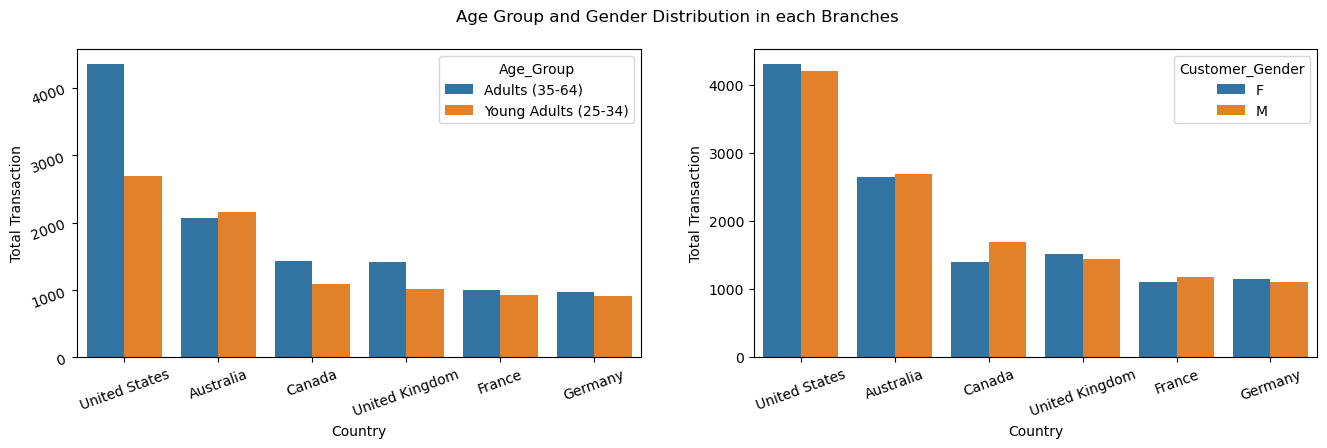

In [72]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
fig.suptitle('Age Group and Gender Distribution in each Branches')

age_group_plot = df[(df['Age_Group'] == 'Young Adults (25-34)') | (df['Age_Group'] == 'Adults (35-64)')].groupby(['Country','Age_Group'])['Customer_Age'].count().reset_index().sort_values(by='Customer_Age',ascending=False)
age_group_plot.rename(columns = {'Customer_Age':'Total Transaction'}, inplace = True)
sns.barplot(data=age_group_plot, x= 'Country', y= 'Total Transaction', hue='Age_Group',ax=axes[0])
axes[0].tick_params(labelrotation=20)


gender_plot = df.groupby(['Country'])[['Customer_Gender']].value_counts().reset_index().sort_values(by=0,ascending=False)
gender_plot.rename(columns = {0:'Total Transaction'}, inplace = True)
sns.barplot(data=gender_plot, x= 'Country', y='Total Transaction', hue='Customer_Gender');
plt.xticks(rotation = 20)

From the left graph, we can see the transaction of two highest age group which is Adults and Young Adults in each branches. We can see most of our branches have almost the same amount of these two age group except on US branch that the difference between the two is quite significant. From the right graph, we can see the gender distribution of our bikeshop buyers in each branch. All of our branches have just the same amount of each gender.

Next, we want to find out the average of our customers age in each branch. We calculate this to see if the the previous age group distribution is correct according to the calculation. 

In [12]:
age_ct = df.groupby(['Country'])[['Customer_Age']].agg(['mean','median','min','max'])
age_ct

Customer_Age               
                       mean median min max
Country                                   
Australia         33.493721   32.0  17  71
Canada            35.331821   34.0  17  74
France            35.195548   33.0  17  86
Germany           34.603372   33.0  17  85
United Kingdom    35.299730   34.0  17  79
United States     36.429327   35.0  17  79

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Canada'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'Australia')])

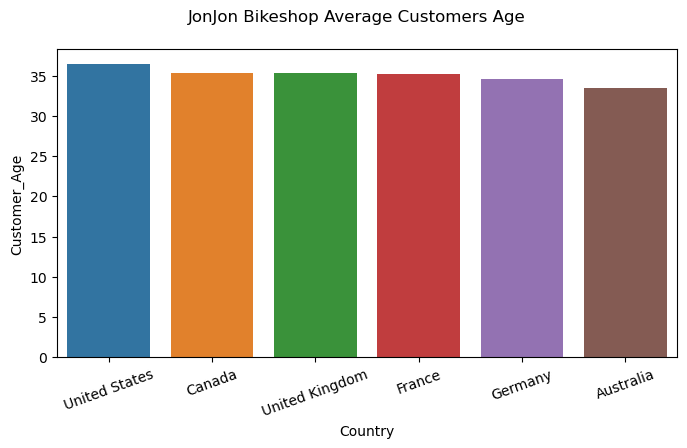

In [71]:
fig2, axes2 = plt.subplots(figsize=(8, 4))
fig2.suptitle('JonJon Bikeshop Average Customers Age')
cst_age_plot = df.groupby(['Country'])[['Customer_Age']].mean().reset_index().sort_values(by='Customer_Age', ascending=False)
sns.barplot(data=cst_age_plot, x= 'Country', y= 'Customer_Age');
plt.xticks(rotation = 20)


From the calculation we can see that the average age of our customers in each branch is 33-35 years old. This is on the age group limit between Adults and Young Adults group. This means the mode of our customers age group before represents the average age of our customers. From the graph, we can also see that the average number of customers age is about the same in each of the branches.

Next, we want to know the profit in every branch from the past year.

In [14]:
profit_ct = df.groupby(['Country'])[['Profit']].agg(['mean','median','count','sum'])
profit_ct

Profit                      
                      mean median count      sum
Country                                         
Australia       337.834302  126.0  5335  1802346
Canada          268.431627   83.0  3086   828380
France          283.412047  110.0  2291   649297
Germany         317.880213  126.0  2254   716502
United Kingdom  343.030007  124.0  2966  1017427
United States   295.454236   93.0  8511  2514611

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'France')])

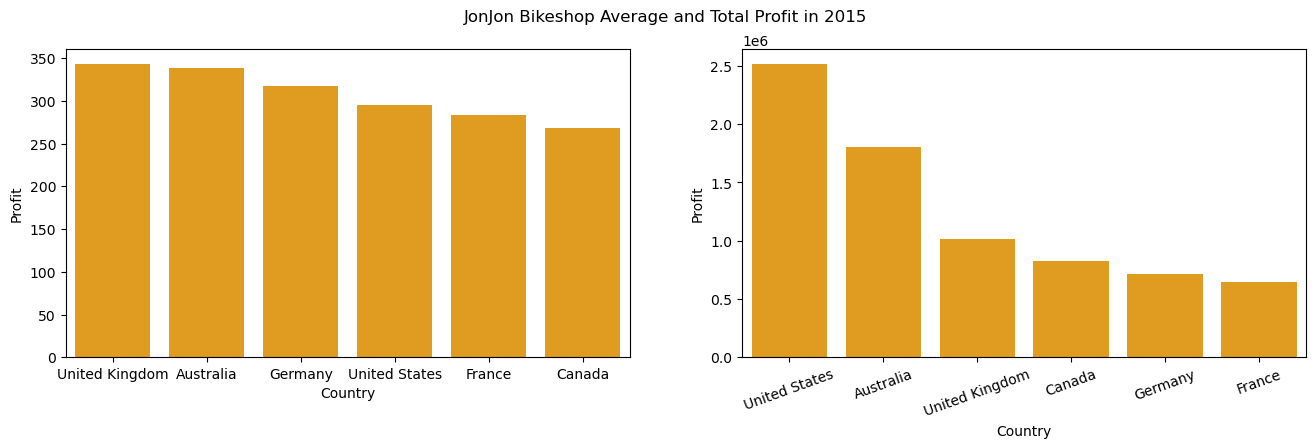

In [74]:
fig3, axes3 = plt.subplots(ncols=2, figsize=(16, 4))
fig3.suptitle('JonJon Bikeshop Average and Total Profit in 2015')

prof_countrys_plot = df.groupby(['Country'])[['Profit']].sum().sort_values(by='Profit',ascending=False).reset_index()
sns.barplot(data=prof_countrys_plot, x= 'Country', y= 'Profit', color='orange',ax=axes3[1]);
plt.xticks(rotation = 20)

prof_country_plot = df.groupby(['Country'])[['Profit']].mean().sort_values(by='Profit',ascending=False).reset_index()
sns.barplot(data=prof_country_plot, x= 'Country', y= 'Profit', color='orange',ax=axes3[0]);
plt.xticks(rotation = 20)

From the calculation, we can see that the highest average profit per transaction is in our UK branch and the lowest is Canada. On the other hand, the total profit is the highest in US branch and the lowest is in France branch. This tells us that high average profit per transaction does not mean high total profit. We will analyze what makes the US branch the highest profit branch of JonJon Bikeshop in the following calculation.

In [16]:
oq_ct = df.groupby(['Country'])[['Order_Quantity']].agg(['mean','median','sum'])
oq_ct

Order_Quantity               
                         mean median     sum
Country                                     
Australia           10.861668    8.0   57947
Canada              13.707712   13.0   42302
France              11.609341   10.0   26597
Germany             11.162822    9.0   25161
United Kingdom      11.388739    9.0   33779
United States       12.187875   11.0  103731

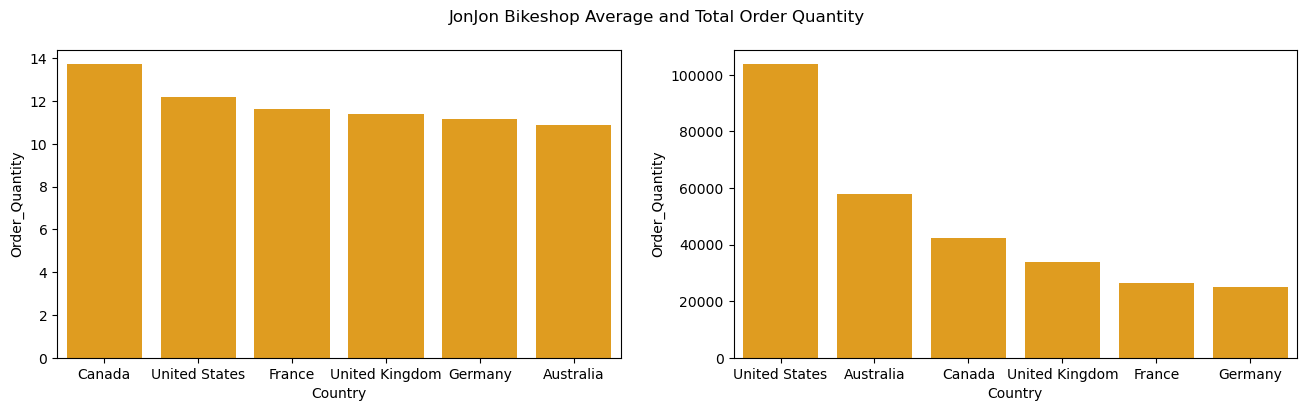

In [76]:
fig4, axes4 = plt.subplots(ncols=2, figsize=(16, 4))
fig4.suptitle('JonJon Bikeshop Average and Total Order Quantity')

oq_plot = df.groupby(['Country'])[['Order_Quantity']].mean().sort_values(by='Order_Quantity',ascending=False).reset_index()
sns.barplot(data=oq_plot, x= 'Country', y= 'Order_Quantity', color='orange',ax=axes4[0]);

oqs_plot = df.groupby(['Country'])[['Order_Quantity']].sum().sort_values(by='Order_Quantity',ascending=False).reset_index()
sns.barplot(data=oqs_plot, x= 'Country', y= 'Order_Quantity', color='orange');


From the calculation, we can see that Canada has the highestg order quantity per transaction followed by US, France, UK, Germany, and Australia. On the other hand, total order quantity is dominated by US, followed by Australia, Canada, Uk, France, and Germany. This supports our calculation before that US has the highest profit. This can happen because in US branch, total items sold is higher than the other branches.

From these results, we can conclude that JonJon Bikeshop's customers' gender is even between male and female with majority of age group is Adults. The most bought items category is Tires and Tubes. The age of our customers is ranging from 17 to 87. We can also see that the most profit was 2.51 M achieved by United States branch with 8.5 K total transaction and 103.75 K quantity of items sold. The central tendency analysis is a brief analysis to help us understand our data. From the analysis we can also conclude that the **United States branch of JonJon Bikeshop is the most successful among 6 branches**. But we will explore further each branch trends of sales to see their growth.

#### Further Exploration

We have stated the boundaries for our analysis using the 5W+1H method in the beginning. Now, we want to answers those question to help us achieve our objective.

First, we want to know what category gives the most profit for our bikeshop. We can group the data by Category and then sum up the revenue for each category.

In [18]:
df.groupby(['Product_Category'])[['Profit']].sum().sort_values(by='Profit',ascending=False)


,Profit
Product_Category,
Bikes,4938927
Accessories,1927540
Clothing,662096


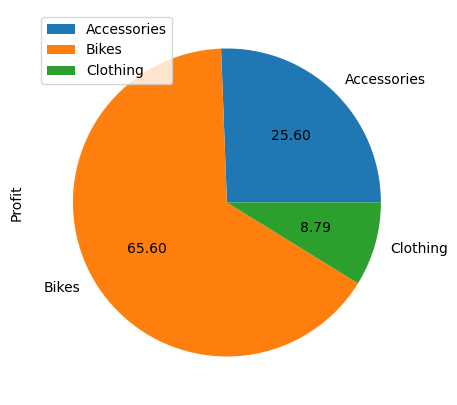

In [19]:
df.groupby(['Product_Category'])[['Profit']].sum().plot(kind='pie', figsize=(5,5), autopct='%.2f',subplots=True);

We can understand that the most profit comes from Bikes category that contributes $4.9M or 65.60% of profit to our Bikeshop. Next, we want to know if this also happen to all our branches.

In [20]:
df.groupby(['Country','Product_Category'])[['Profit']].sum()

Profit
Country        Product_Category         
Australia      Accessories        335821
               Bikes             1356157
               Clothing           110368
Canada         Accessories        321505
               Bikes              364145
               Clothing           142730
France         Accessories        164894
               Bikes              435723
               Clothing            48680
Germany        Accessories        177498
               Bikes              507968
               Clothing            31036
United Kingdom Accessories        237671
               Bikes              718532
               Clothing            61224
United States  Accessories        690151
               Bikes             1556402
               Clothing           268058

We can see that this condition applies to all our branches. Next, we want to know what kind of bikes (sub category) contribute the most profit.

In [21]:
df[(df['Product_Category'] == 'Bikes')][['Country','Sub_Category','Profit']].groupby(['Country','Sub_Category'])[['Profit']].sum()

Profit
Country        Sub_Category          
Australia      Mountain Bikes  552615
               Road Bikes      684991
               Touring Bikes   118551
Canada         Mountain Bikes  167510
               Road Bikes      154445
               Touring Bikes    42190
France         Mountain Bikes  186181
               Road Bikes      193284
               Touring Bikes    56258
Germany        Mountain Bikes  212521
               Road Bikes      229079
               Touring Bikes    66368
United Kingdom Mountain Bikes  284896
               Road Bikes      329984
               Touring Bikes   103652
United States  Mountain Bikes  743090
               Road Bikes      602803
               Touring Bikes   210509

From the calculation, we can create a graph that will help us understand the comparison between each bike profit on our 6 branches.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Canada')])

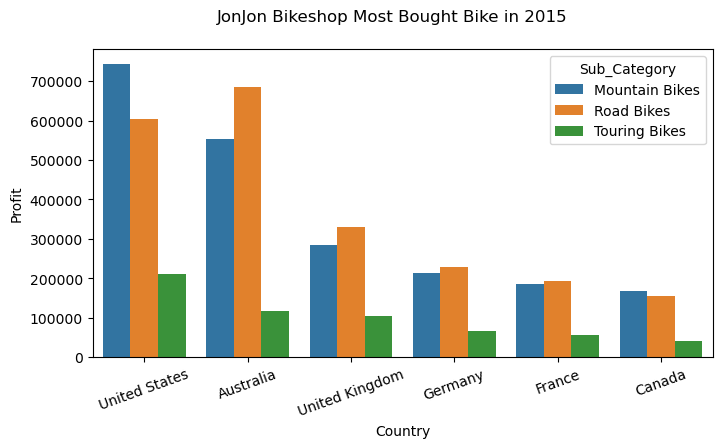

In [77]:
fig5, axes5 = plt.subplots(figsize=(8, 4))
fig5.suptitle('JonJon Bikeshop Most Bought Bike in 2015')

bike_plot = df[(df['Product_Category'] == 'Bikes')][['Country','Sub_Category','Profit']].groupby(['Country','Sub_Category'])[['Profit']].sum().reset_index().sort_values(by='Profit',ascending=False)
#age_group_plot.rename(columns = {'Customer_Age':'Total Transaction'}, inplace = True)
sns.barplot(data=bike_plot, x= 'Country', y= 'Profit', hue='Sub_Category')
plt.xticks(rotation = 20)

From the calculation and graph we can see that most of our branches highest profit comes from selling Road Bikes except on US branch that has Mountain Bikes for the highest profit Bikes. On the other hand, the lowest selling Bikes in all branches is the same, that is Touring Bikes.

After knowing what bikes is sold the most in our branches, we want to know which branch that has the biggest number of sold accessories. We will group the data by Country and Accessories only, then calculate the sum of order quantity column.

In [24]:
df[(df['Product_Category'] == 'Accessories')][['Country','Product_Category','Order_Quantity']].groupby(['Country','Product_Category'])[['Order_Quantity']].agg('sum').sort_values(by='Order_Quantity',ascending=False)

,,Order_Quantity
Country,Product_Category,
United States,Accessories,80572
Australia,Accessories,43555
Canada,Accessories,33955
United Kingdom,Accessories,26212
France,Accessories,20662
Germany,Accessories,19884


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'United Kingdom'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Germany')])

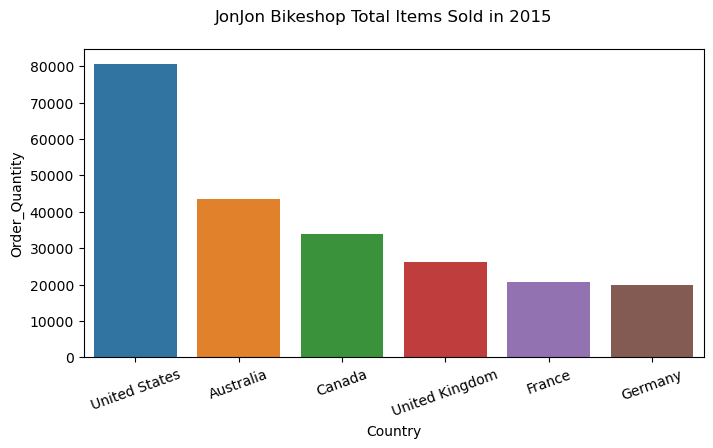

In [79]:
fig6, axes6 = plt.subplots(figsize=(8, 4))
fig6.suptitle('JonJon Bikeshop Total Items Sold in 2015')

catoq_plot = df[(df['Product_Category'] == 'Accessories')][['Country','Product_Category','Order_Quantity']].groupby(['Country','Product_Category'])[['Order_Quantity']].agg('sum').sort_values(by='Order_Quantity',ascending=False).reset_index()
sns.barplot(data=catoq_plot, x= 'Country', y= 'Order_Quantity')
plt.xticks(rotation = 20)

Here, we can see that the branch with biggest number of sold accessories is United States with $80.5K followed by Australia, Canada, UK, France, and Germany. This happen because as we see before, our branch in US has the most order quantity items and the majority of them is Accessories.

Next, we want to see what kind of accessories is sold most on each branch.

In [26]:
df[(df['Product_Category'] == 'Accessories')][['Country','Product_Category','Sub_Category','Order_Quantity']].groupby(['Country','Sub_Category'])[['Order_Quantity']].sum()

Order_Quantity
Country        Sub_Category                     
Australia      Bike Racks                     87
               Bike Stands                   197
               Bottles and Cages            9964
               Cleaners                     1317
               Fenders                      2292
               Helmets                      7769
               Hydration Packs              1343
               Tires and Tubes             20586
Canada         Bike Racks                    156
               Bike Stands                    58
               Bottles and Cages            6808
               Cleaners                      742
               Fenders                      2924
               Helmets                      5076
               Hydration Packs               822
               Tires and Tubes             17369
France         Bike Racks                    128
               Bike Stands                    52
               Bottles and Cages            4489
               Cleaners                      320
               Fenders                       639
               Helmets                      3984
               Hydration Packs               399
               Tires and Tubes             10651
Germany        Bike Racks                     68
               Bike Stands                    46
               Bottles and Cages            4912
               Cleaners                      388
               Fenders                       936
               Helmets                      4057
               Hydration Packs               180
               Tires and Tubes              9297
United Kingdom Bike Racks                     70
               Bike Stands                    55
               Bottles and Cages            5913
               Cleaners                      554
               Fenders                       914
               Helmets                      5282
               Hydration Packs               350
               Tires and Tubes             13074
United States  Bike Racks                    491
               Bike Stands                   214
               Bottles and Cages           17264
               Cleaners                     2445
               Fenders                      6097
               Helmets                     13330
               Hydration Packs              1553
               Tires and Tubes             39178

Here, we can see that all branches have Tires and Tubes as the most sold accessories category followed by Bottles and Cages, and Helmets. These three items is the biggest among the others because these 3 items are consumable and wore out in time, so people may go back to the shop to buy the same item after some time. So, it makes sense to have these three as the most sold Accessories category.

Next, we want to know how many times each age group shop in our bikeshop? This helps us understand who shops at our bikeshop the most.

In [27]:
df.groupby(['Age_Group'])[['Age_Group']].count()

,Age_Group
Age_Group,
Adults (35-64),11236
Seniors (64+),131
Young Adults (25-34),8785
Youth (<25),4291


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Adults (35-64)'),
  Text(1, 0, 'Young Adults (25-34)'),
  Text(2, 0, 'Youth (<25)'),
  Text(3, 0, 'Seniors (64+)')])

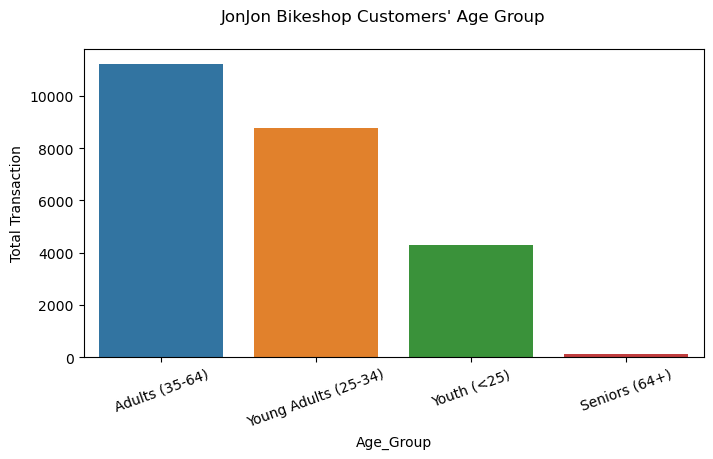

In [81]:
fig7, axes7 = plt.subplots(figsize=(8, 4))
fig7.suptitle("JonJon Bikeshop Customers' Age Group")

ageoq_plot = ageoq_plot = df.groupby(['Age_Group'])[['Country']].count().reset_index().sort_values(by='Country',ascending=False)
ageoq_plot.rename(columns = {'Country':'Total Transaction'}, inplace = True)
sns.barplot(data=ageoq_plot, x= 'Age_Group', y= 'Total Transaction')
plt.xticks(rotation = 20)

Here, we can see the Age Group that shops in our bikeshop the most, that is Adults with age ranging from 35 to 64 years old followed by Young Adults, Youth, and the least is Seniors. But, we also want to see if this applies on all our branches or not. Since Youth and Seniors age group is so low compared to the other two, we will only compare the Adults and Young Adults age group in each branch.

In [29]:
df.groupby(['Country','Age_Group'])[['Age_Group']].count()

Age_Group
Country        Age_Group                      
Australia      Adults (35-64)             2062
               Seniors (64+)                17
               Young Adults (25-34)       2162
               Youth (<25)                1094
Canada         Adults (35-64)             1426
               Seniors (64+)                20
               Young Adults (25-34)       1087
               Youth (<25)                 553
France         Adults (35-64)             1003
               Seniors (64+)                 8
               Young Adults (25-34)        922
               Youth (<25)                 358
Germany        Adults (35-64)              973
               Seniors (64+)                21
               Young Adults (25-34)        916
               Youth (<25)                 344
United Kingdom Adults (35-64)             1420
               Seniors (64+)                20
               Young Adults (25-34)       1012
               Youth (<25)                 514
United States  Adults (35-64)             4352
               Seniors (64+)                45
               Young Adults (25-34)       2686
               Youth (<25)                1428

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'United Kingdom'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Germany')])

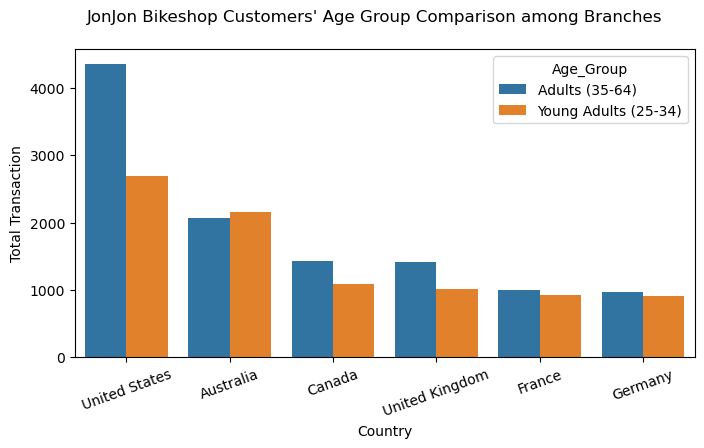

In [82]:
fig8, axes8 = plt.subplots(figsize=(8, 4))
fig8.suptitle("JonJon Bikeshop Customers' Age Group Comparison among Branches")

age_group_plot = df[(df['Age_Group'] == 'Young Adults (25-34)') | (df['Age_Group'] == 'Adults (35-64)')].groupby(['Country','Age_Group'])['Customer_Age'].count().reset_index().sort_values(by='Customer_Age',ascending = False)
age_group_plot.rename(columns = {'Customer_Age':'Total Transaction'}, inplace = True)
sns.barplot(data=age_group_plot, x= 'Country', y= 'Total Transaction', hue='Age_Group')
plt.xticks(rotation=20)

After we check the customers' age group on each branches, we can see that majority of our branches have Adults as the most buyers except for Australia that has Young Adults as the most buyers. This means in Australia, there are more young adults that cycle than Adults.

We already have the number of transaction for each age group, now we want to compare the profit contributed by each age group.

In [31]:
df.groupby(['Age_Group'])[['Profit']].agg(['mean','sum'])

Profit         
                            mean      sum
Age_Group                                
Adults (35-64)        305.878159  3436847
Seniors (64+)         152.625954    19994
Young Adults (25-34)  327.900740  2880608
Youth (<25)           277.584246  1191114

This data tells us the overall average and sum of profit of our bikeshop. The highest profit comes from Adults age group, this is in accordance with the statement before, that Adults age group shops the most in our bikeshop.

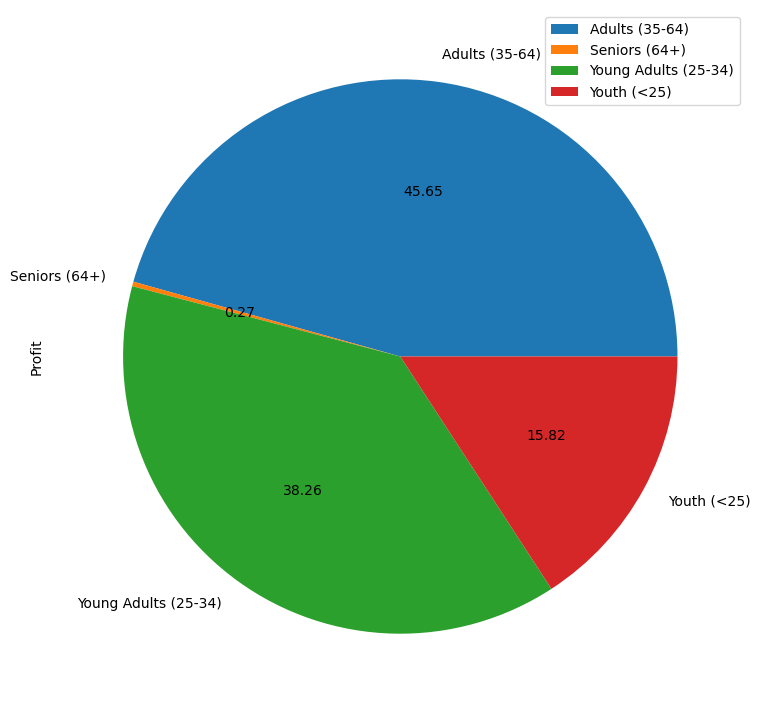

In [84]:
df.groupby(['Age_Group'])[['Profit']].sum().plot(kind='pie', figsize=(9,9), autopct='%.2f',subplots=True);

From the pie chart, we can see that the two age group that contribute the most to our profit is Adults with $3.4M or 45.65% of total profit and Young Adults with $2.8M or 38.26% of total profit.

Next, we want to know which branches have the most and least profit in the last year of sales.

In [33]:
df.groupby(['Country'])[['Profit']].agg(['sum']).sort_values(by=[('Profit','sum')],ascending=False)

,Profit
,sum
Country,
United States,2514611
Australia,1802346
United Kingdom,1017427
Canada,828380
Germany,716502
France,649297


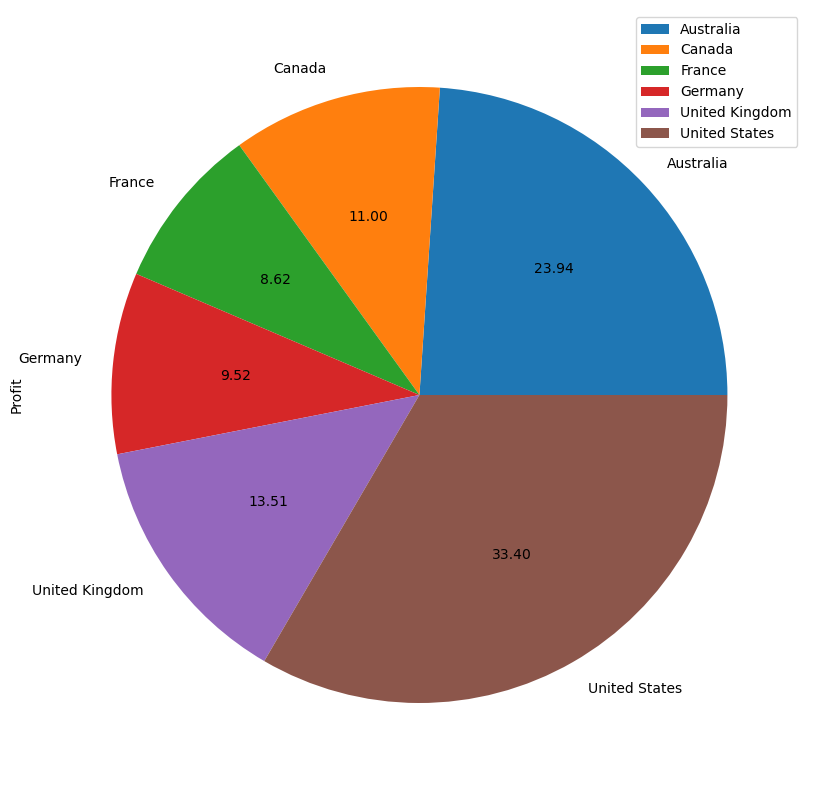

In [34]:
df.groupby(['Country'])[['Profit']].sum().plot(kind='pie', figsize=(10,10), autopct='%.2f',subplots=True);

Here, we see that the bikeshop with highest profit is United States branch and the lowest profit is France branch. This is still in accordance with earlier analysis that the US branch is still on the most successful branch among the others with $2.5M profit or 33.40% of total profit.

Next we want to compare, each branch monthly profit to see the branches growth, but first, we will see the overall monthly profit of JonJon Bikeshop.

,Profit
Month,
January,219194
February,220611
March,236086
April,237588
May,297294
June,258864
July,609952
August,876535
September,986391


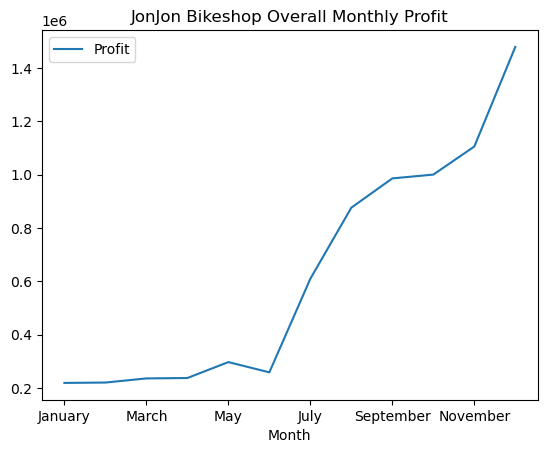

In [143]:
tot_mp=df.groupby(['Month'],sort=False)[['Profit']].sum()
tot_mp.plot(title='JonJon Bikeshop Overall Monthly Profit');

Now, we want to see the monthly profit of each branch in the last year. First, we want to see the monthly profit of US branch.

In [128]:
#plt.figure(figsize=(32,12))
#ax = plt.subplot(121) 
#df[(df['Country'] == 'United States')][['Date','Month','Profit']].groupby(['Month'],sort=False)[['Profit']].sum().plot(ax=ax,legend=True)  
##df[(df['Country'] == 'Australia')][['Date','Month','Profit']].groupby(['Month'],sort=False)[['Profit']].sum().plot(ax=ax)  
#df[(df['Country'] == 'United Kingdom')][['Date','Month','Profit']].groupby(['Month'],sort=False)[['Profit']].sum().plot(ax=ax)
#df[(df['Country'] == 'Canada')][['Date','Month','Profit']].groupby(['Month'],sort=False)[['Profit']].sum().plot(ax=ax)
#df[(df['Country'] == 'Germany')][['Date','Month','Profit']].groupby(['Month'],sort=False)[['Profit']].sum().plot(ax=ax)
#df[(df['Country'] == 'France')][['Date','Month','Profit']].groupby(['Month'],sort=False)[['Profit']].sum().plot(ax=ax)

#plt.show() 

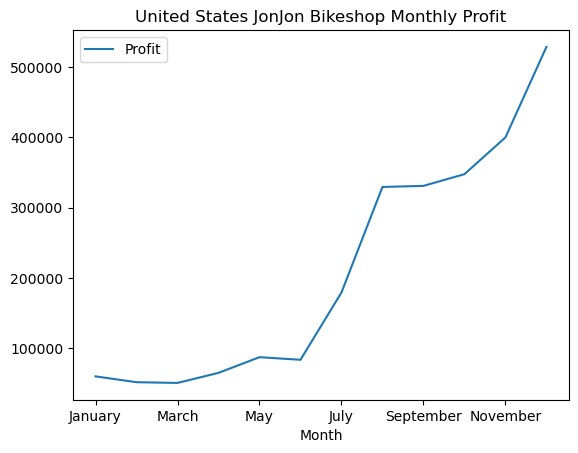

In [144]:
us_mp=df[(df['Country'] == 'United States')][['Date','Month','Profit']].groupby(['Month'],sort=False)[['Profit']].sum()
us_mp.plot(title = 'United States JonJon Bikeshop Monthly Profit');

Next, the monthly profit of Australia branch.

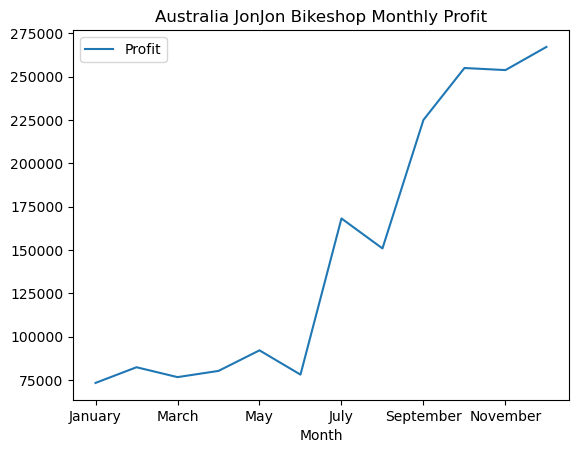

In [145]:
aus_mp=df[(df['Country'] == 'Australia')][['Date','Month','Profit']].groupby(['Month'],sort=False)[['Profit']].sum()
aus_mp.plot(title = 'Australia JonJon Bikeshop Monthly Profit');

Monthly profit of UK branch.

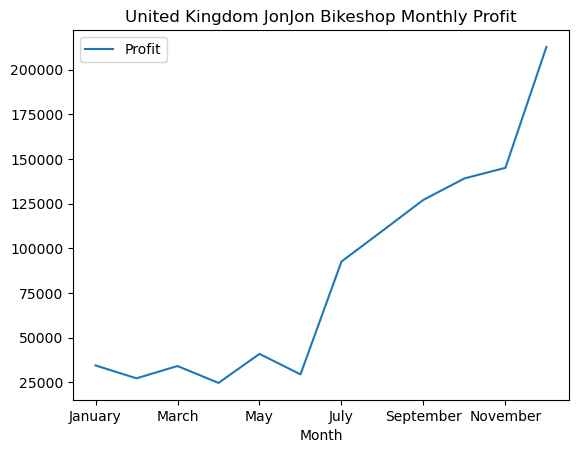

In [146]:
uk_mp=df[(df['Country'] == 'United Kingdom')][['Date','Month','Profit']].groupby(['Month'],sort=False)[['Profit']].sum()
uk_mp.plot(title = 'United Kingdom JonJon Bikeshop Monthly Profit');

Monthly profit of Canada branch

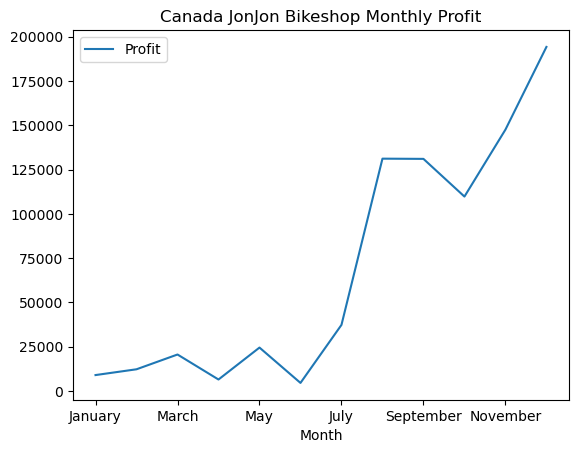

In [147]:
can_mp=df[(df['Country'] == 'Canada')][['Date','Month','Profit']].groupby(['Month'],sort=False)[['Profit']].sum()
can_mp.plot(title = 'Canada JonJon Bikeshop Monthly Profit');

Monthly profit of Germany branch.

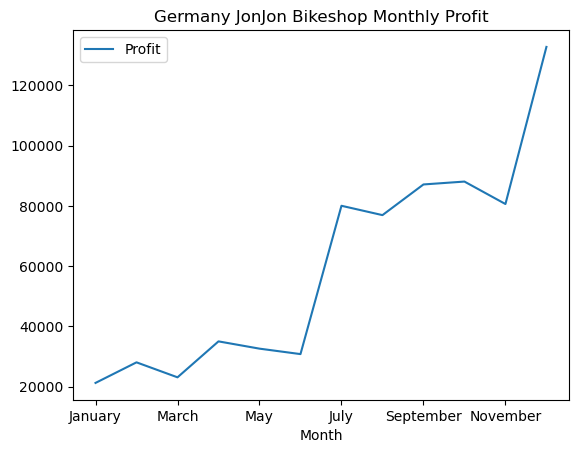

In [148]:
ger_mp=df[(df['Country'] == 'Germany')][['Date','Month','Profit']].groupby(['Month'],sort=False)[['Profit']].sum()
ger_mp.plot(title = 'Germany JonJon Bikeshop Monthly Profit');

Monthly profit of France branch.

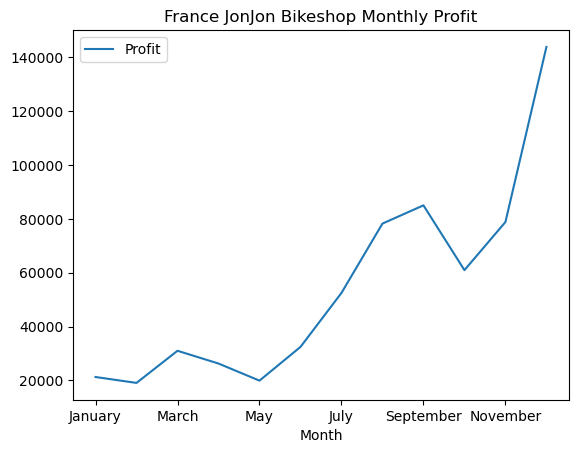

In [149]:
fra_mp=df[(df['Country'] == 'France')][['Date','Month','Profit']].groupby(['Month'],sort=False)[['Profit']].sum()
fra_mp.plot(title = 'France JonJon Bikeshop Monthly Profit');

From all the graph we see, we can conclude that each branch is growing successfully although there are ups and downs in profit, but they manage to raise their profit at the end of the year.

#### Hypothesis Testing

In previous analysis, we see that our branch in Germany and France have almost the same profit. Here, we will check whether the two branches is really the same statistically. We will test this hypothesis using t-test method. First, we define the hypothesis that we will check as follows:

H0 = &mu; Germany profit = &mu; France profit

H1 = &mu; Germany profit != &mu; France profit


Then, we check the statistical overview of the two branches statistical overview.

In [51]:
ger_profit = df[(df['Country']=='Germany')][['Profit']]
ger_profit.describe().T

,count,mean,std,min,25%,50%,75%,max
Profit,2254.0,317.880213,483.172275,0.0,33.0,126.0,397.0,4114.0


In [52]:
fra_profit = df[(df['Country']=='France')][['Profit']]
fra_profit.describe().T

,count,mean,std,min,25%,50%,75%,max
Profit,2291.0,283.412047,429.693533,-30.0,23.0,110.0,366.5,3722.0


The average profit on both branches have about $30 difference. We want to find out wheter it is statistical significantly differece or not. We can do that by calculating the p-value.

In [53]:
# t-test 2 sample 2 tailed
t_stat, p_val = stats.ttest_ind(ger_profit, fra_profit)

# ttest_ind is 2-tailed, we dont need to divide by 2
print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: [0.01104555]
t-statistics: [2.54229775]


c:\Users\blob\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\blob\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[-629.12004512]
[1264.88047103]


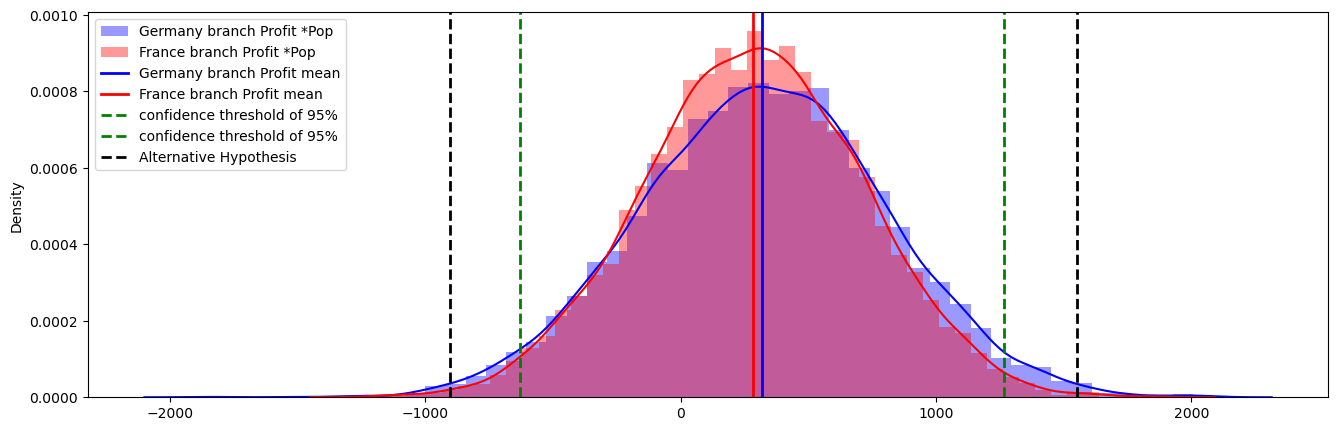

In [55]:
# simulation
ger_pop = np.random.normal(ger_profit.mean(),ger_profit.std(),10000)
fra_pop = np.random.normal(fra_profit.mean(),fra_profit.std(),10000)

# confidence interval based on Germany branch Profit
# used cv = 0.05 since 2 tailed, we use 0.95 as it is. 
ci = stats.norm.interval(0.95, ger_profit.mean().values, ger_profit.std().values)

plt.figure(figsize=(16,5))
sns.distplot(ger_pop, label='Germany branch Profit *Pop',color='blue')
sns.distplot(fra_pop, label='France branch Profit *Pop',color='red')

# mean
plt.axvline(ger_profit.mean().values, color='blue', linewidth=2, label='Germany branch Profit mean')
plt.axvline(fra_profit.mean().values, color='red',  linewidth=2, label='France branch Profit mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

# alternative hypotesis
plt.axvline(ger_pop.mean()+t_stat*ger_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(ger_pop.mean()-t_stat*ger_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
print(ci[0])
print(ci[1])

On, statistical terms, the p-value (0.01) is below the critical point (0.05). So, the result of this hypothesis testing is that we reject H0.

Insight that can be taken for us is that this means that the average profit in Germany branch is not the same as France branch. We can focus on France branch to reach higher average profit by increasing number of customers or selling new items that has France nationality attributes so that locals may be more interested in buying our products.

H0 = &mu; Young Adults profit = &mu; Adults profit

H1 = &mu; Young Adults profit != &mu; Adults profit


In [56]:
ya = df[(df['Age_Group']=='Young Adults (25-34)')][['Profit']]
ya.describe().T

,count,mean,std,min,25%,50%,75%,max
Profit,8785.0,327.90074,507.455909,-30.0,34.0,128.0,405.0,4114.0


In [57]:
a = df[(df['Age_Group']=='Adults (35-64)')][['Profit']]
a.describe().T

,count,mean,std,min,25%,50%,75%,max
Profit,11236.0,305.878159,508.662205,-24.0,28.0,107.0,366.0,15096.0


In [58]:
# t-test 2 sample 2 tailed
t_stat, p_val = stats.ttest_ind(ya, a)

# ttest_ind is 2-tailed, we dont need to divide by 2
print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: [0.00234413]
t-statistics: [3.04315765]


c:\Users\blob\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\blob\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[-666.6945653]
[1322.49604509]


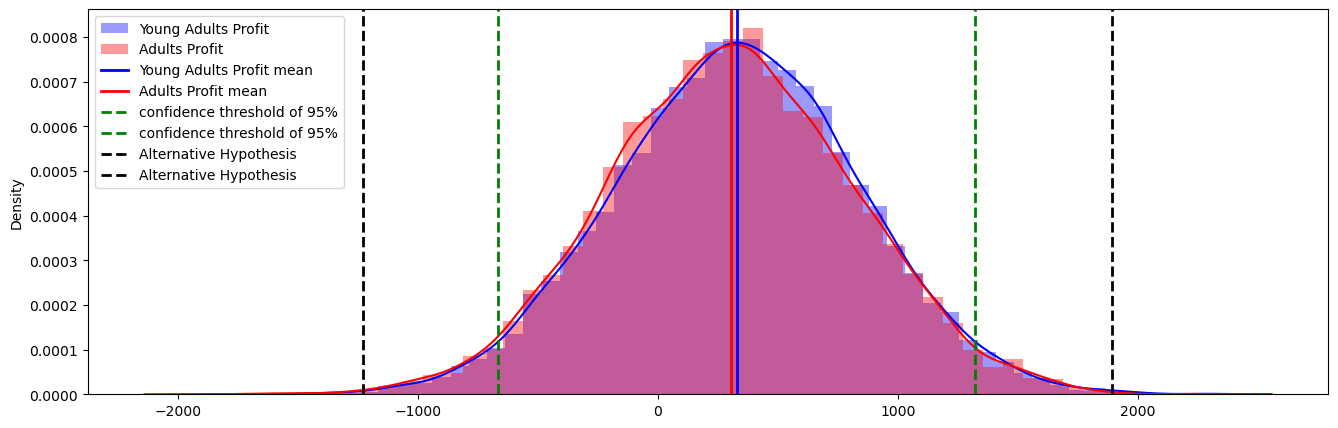

In [59]:
# simulation
ya_pop = np.random.normal(ya.mean(),ya.std(),10000)
a_pop = np.random.normal(a.mean(),a.std(),10000)

# confidence interval based on Young Adults Profit
# used cv = 0.05 since 2 tailed, we use 0.95 as it is. 
ci = stats.norm.interval(0.95, ya.mean(), ya.std());

# distribution
plt.figure(figsize=(16,5))
sns.distplot(ya_pop, label='Young Adults Profit',color='blue');
sns.distplot(a_pop, label='Adults Profit',color='red');

# mean
plt.axvline(ya_pop.mean(), color='blue', linewidth=2, label='Young Adults Profit mean');
plt.axvline(a_pop.mean(), color='red',  linewidth=2, label='Adults Profit mean');

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%');
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%');

# alternative hypotesis
plt.axvline(ya_pop.mean()+t_stat*a_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis');
plt.axvline(ya_pop.mean()-t_stat*a_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis');

plt.legend()
print(ci[0])
print(ci[1])

## Conclusion

From our analysis we can conclude that:

1. The top category that gives the most profit for our bikeshop is **Bikes category** with the domination of **Road Bikes** followed by **Mountain Bikes**, and **Touring Bikes**.

2. The branch with highest number of sold item is **United States** with **Tires and Tubes** category as the best selling sub category under the **Accessories** cateogry.

3. The most transaction in our Bikeshop is dominated by **Adults** age group with age ranging from 35 to 64 and followed by **Young Adults** with age ranging from 25 to 34. The highest profit gained also comes from **Adults** age group with total of **$3.4M** and followed by **Young Adults** with total of **$2.8M**.

4. The branch that has the most profit is **United States** branch with total of **$2.5M** followed by **Australia, UK, Canada, Germany, France**.

5. The highest of JonJon Bikeshop profit is the **highest at December** and the **lowest at January**.

6. The trend of JonJon Bikeshop profit is looking good with a huge **significant increase in the last 6 months** of sales.